In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column

from astropy.io import ascii
import glob, re

from scipy.ndimage.filters import gaussian_filter1d

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [2]:
ls ../data/HD_181778/

HD_181778_smear_combined.even.clip.fft  HD_181778_smear_combined.odd.clip.fft
HD_181778_smear_combined.even.clip.ts   HD_181778_smear_combined.odd.clip.ts
HD_181778_smear_combined.full.clip.fft  HD_181778_smear_combined.png
HD_181778_smear_combined.full.clip.ts   HD_181778_smear_combined.zoomin.png


In [3]:
fname_even = "../data/HD_181778/HD_181778_smear_combined.even.clip.fft"
fname_odd = "../data/HD_181778/HD_181778_smear_combined.odd.clip.fft"


In [4]:
even = Table.read(fname_even,format='ascii')
odd = Table.read(fname_odd,format='ascii')

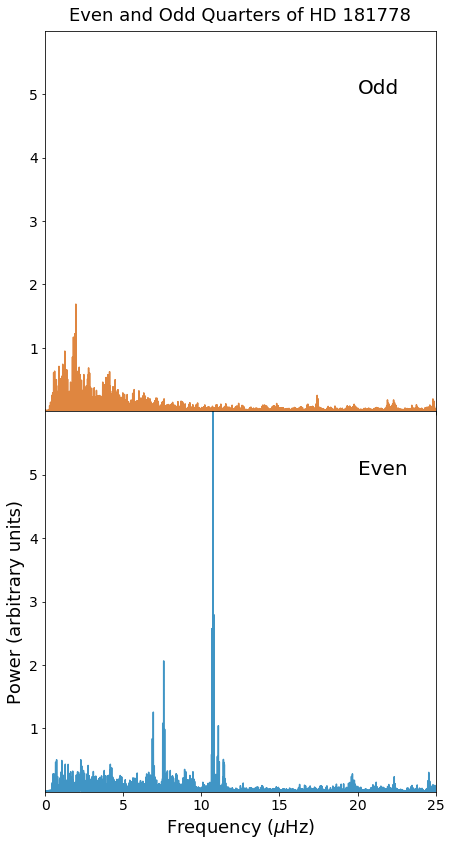

In [15]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(7.0,14.0),sharex=True,sharey=True)

ax1.plot(odd['fre'],odd['power']/1e6,label='Odd',alpha=0.75,color=colours[2])
ax2.plot(even['fre'],even['power']/1e6,label='Even',alpha=0.75)
ax1.text(20,5,'Odd',fontsize=20)
ax1.set_yticks(np.arange(5)+1.)
ax2.text(20,5,'Even',fontsize=20)

plt.xlim(0,25)
plt.ylim(0,6)
plt.xlabel(r'Frequency ($\mu$Hz)')
plt.ylabel('Power (arbitrary units)')
ax1.set_title("Even and Odd Quarters of HD 181778",y=1.01,fontsize=18)
# plt.legend(fontsize=20)
f.subplots_adjust(hspace=0)
plt.savefig('../paper/contam_HD_181778.png',bbox_inches='tight')

In [6]:
total_pix = 1024*2200*2*42

In [7]:
lc_pix = 170000*32
sc_pix = 512*85
obs_pix = lc_pix+sc_pix

In [8]:
obs_frac = obs_pix/(1.0*total_pix)
print obs_frac

0.0289772727273


In [9]:
5.4e6/95.e6

0.056842105263157895

### Now do it for all the stars, finding the overlap integral

In [10]:
fnames_even = glob.glob('../data/PowerSpectra/*even*')
fnames_odd = glob.glob('../data/PowerSpectra/*odd*')

In [11]:
fnames_odd[0]

'../data/PowerSpectra/HD_180475_smear_combined.odd.clip.fft'

In [12]:
print starname

NameError: name 'starname' is not defined

In [ ]:

def plot_contam(odd,even,starname,fname_out):
    f, (ax1, ax2) = plt.subplots(2,1,figsize=(7.0,14.0),sharex=True,sharey=True)

    ax1.plot(odd['fre'],odd['power']/1e6,label='Odd',alpha=0.75,color=colours[2])
    ax2.plot(even['fre'],even['power']/1e6,label='Even',alpha=0.75)

    plt.xlim(0,np.max(odd['fre']))
    plt.ylim(0,np.max([np.max(even['power']/1.e6),np.max(odd['power']/1.e6)]))
    plt.xlabel(r'Frequency ($\mu$Hz)')
    plt.ylabel('Power (arbitrary units)')
    ax1.set_title("Even and Odd Quarters of %s" % starname,y=1.01,fontsize=18)
    # plt.legend(fontsize=20)
    f.subplots_adjust(hspace=0)
    plt.savefig(fname_out,bbox_inches='tight')

In [ ]:
overlaps = []

for j, fname_even in enumerate(fnames_even):
    starname = re.search('PowerSpectra/(.+?)_smear_combined', fname_even).group(1)
    fname_odd = '../data/PowerSpectra/%s_smear_combined.odd.clip.fft' % starname
    even = Table.read(fname_even,format='ascii')
    odd = Table.read(fname_odd,format='ascii')

    norm_even = even['power']
    norm_even = gaussian_filter1d(norm_even,3)
    norm_even /= np.sum(even['power'])

    norm_odd = odd['power']#/np.sum(odd['power'])
    norm_odd = gaussian_filter1d(norm_odd,3)

    norm_odd = np.interp(even['fre'],odd['fre'],norm_odd)
    norm_odd /= norm_odd.sum()
    
    overlap = np.dot(np.sqrt(norm_odd),np.sqrt(norm_even))
    
    overlaps.append(overlap)
    
    if overlap<0.9:
        plt.clf()
        print starname,'is bad!'
        plot_contam(odd,even,starname.replace('_',' '),'./contam/%s_contam.png' % starname)

In [ ]:
fnames_even = glob.glob('../data/*/*.even.clip.fft')

In [ ]:
np.sum(np.array(overlaps)<0.9)

In [ ]:
h = plt.hist(overlaps,bins=25,edgecolor='black',linewidth=2,color=colours[5])
plt.axvline(0.9,color=colours[2])
plt.xlabel('Overlap')
plt.ylabel('Counts')
plt.title('Contamination',y=1.02)
plt.savefig('../paper/contam.eps')